# Demonstration of angular resampling

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, UnivariateSpline

In [42]:
# Parameters
fs = 50000  # frequency sampling rate
dt = 1 / fs  # time resolution
t = np.arange(0, 3, dt)  # time axis
len_t = len(t)  # time vector length

speed = np.linspace(10, 30, len_t)  # speed vector
sig_t = np.sin(2 * np.pi * np.cumsum(speed * dt))  # signal in the time domain

In [43]:
def angular_resampling(t, speed, sig_t):
    # Time resolution
    dt = t[1] - t[0]
    
    # Calculate cumulative phase of the shaft
    cumulative_phase = np.cumsum(speed * dt)
    cumulative_phase -= cumulative_phase[0]

    # Sampling rate in the cycle domain after angular resampling
    cyc_fs = int(1 / (dt * min(speed)))
    
    # Generate constant phase intervals
    constant_phase_intervals = np.linspace(0, max(cumulative_phase), int(cyc_fs * max(cumulative_phase)))
    
    # Interpolate to find new time points with constant phase intervals
    interp_func = interp1d(cumulative_phase, t, kind='linear')
    times_of_constant_phase_intervals = interp_func(constant_phase_intervals)
    
    # Use UnivariateSpline for spline interpolation
    spline_interpolator = UnivariateSpline(t, sig_t, s=0)  # s=0 means no smoothing
    sig_cyc = spline_interpolator(times_of_constant_phase_intervals)

    # Sample points for optional resampling back to the time domain
    sample_pnts = {
        'times_of_constant_time_intervals': t,
        'times_of_constant_phase_intervals': times_of_constant_phase_intervals
    }

    return sig_cyc, cyc_fs, sample_pnts

In [44]:
# Angular resampling (define the function angular_resampling first)
sig_cyc, cyc_fs, sample_pnts = angular_resampling(t, speed, sig_t)

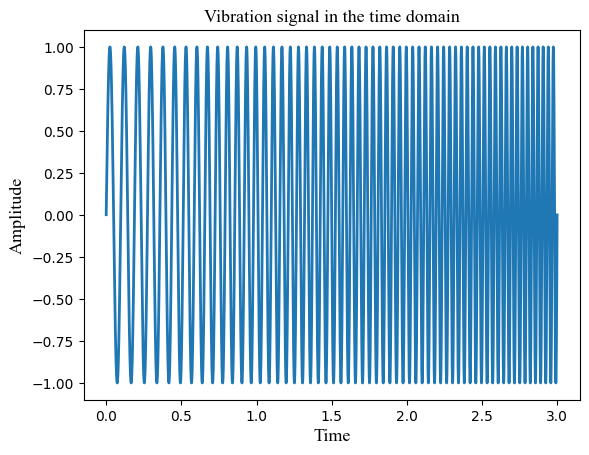

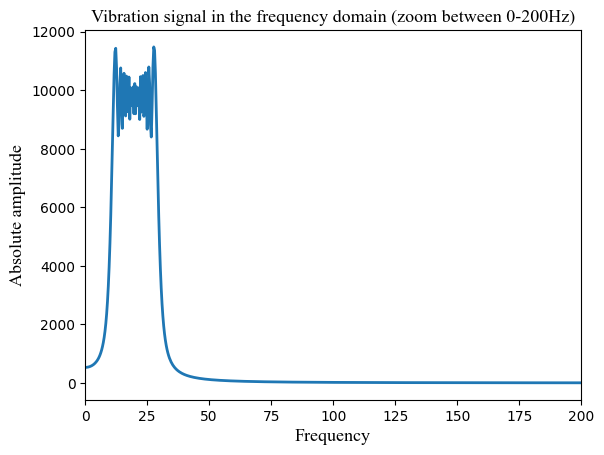

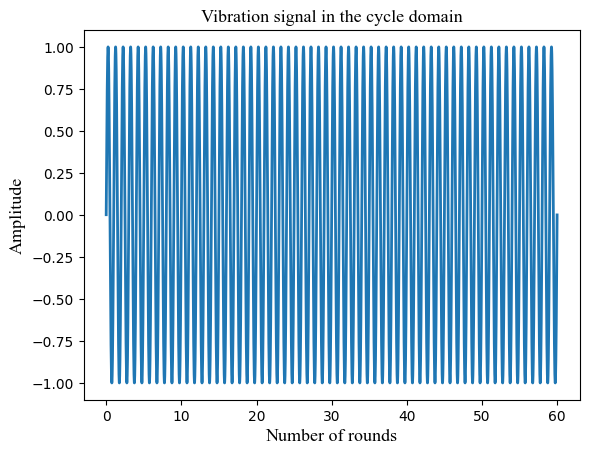

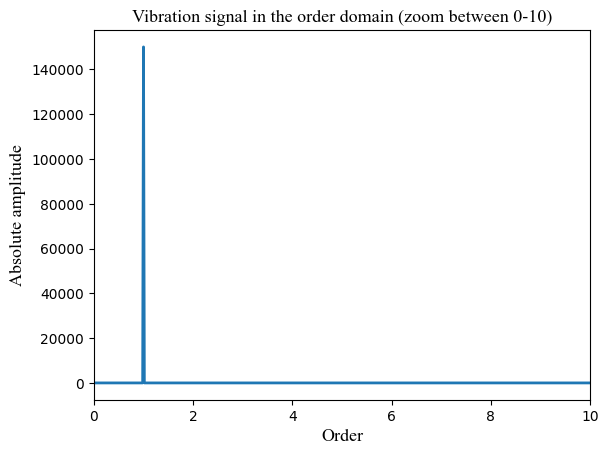

In [45]:
# Part for figures
sig_f = np.fft.fft(sig_t)  # signal in the frequency domain
sig_order = np.fft.fft(sig_cyc)  # signal in the order domain

df = 1 / (dt * len_t)  # frequency resolution
len_f = len_t  # frequency vector length
f = np.arange(0, df * len_f, df)  # frequency axis
dcyc = 1 / cyc_fs  # cycle resolution
len_cyc = len(sig_cyc)  # cycle vector length
cyc = np.arange(0, dcyc * len_cyc, dcyc)  # cycle vector
dorder = 1 / (dcyc * len_cyc)  # order resolution
len_order = len_cyc  # order vector length
order = np.arange(0, dorder * len_order, dorder)  # order vector

axis_font_size = 5
title_font_size = 13
axis_name_font_size = 13

plt.figure()
plt.plot(t, sig_t, linewidth=2)
plt.title('Vibration signal in the time domain', fontname='Times New Roman', fontsize=title_font_size)
plt.xlabel('Time', fontname='Times New Roman', fontsize=axis_name_font_size)
plt.ylabel('Amplitude', fontname='Times New Roman', fontsize=axis_name_font_size)

plt.figure()
plt.plot(f[:len_f // 2], np.abs(sig_f[:len_f // 2]), linewidth=2)
plt.title('Vibration signal in the frequency domain (zoom between 0-200Hz)', fontname='Times New Roman', fontsize=title_font_size)
plt.xlabel('Frequency', fontname='Times New Roman', fontsize=axis_name_font_size)
plt.ylabel('Absolute amplitude', fontname='Times New Roman', fontsize=axis_name_font_size)
plt.xlim([0, 200])

plt.figure()
plt.plot(cyc, sig_cyc, linewidth=2)
plt.title('Vibration signal in the cycle domain', fontname='Times New Roman', fontsize=title_font_size)
plt.xlabel('Number of rounds', fontname='Times New Roman', fontsize=axis_name_font_size)
plt.ylabel('Amplitude', fontname='Times New Roman', fontsize=axis_name_font_size)

plt.figure()
plt.plot(order[:len_order // 2], np.abs(sig_order[:len_order // 2]), linewidth=2)
plt.title('Vibration signal in the order domain (zoom between 0-10)', fontname='Times New Roman', fontsize=title_font_size)
plt.xlabel('Order', fontname='Times New Roman', fontsize=axis_name_font_size)
plt.ylabel('Absolute amplitude', fontname='Times New Roman', fontsize=axis_name_font_size)
plt.xlim([0, 10])

plt.show()